## Sentiment Analysis Using TF-IDF and Logistic Regression

## 1. Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## 2. Load the Dataset

In [6]:
# Load the dataset
df = pd.read_csv(r'C:\Users\PC\Downloads\CodTech\reddit_vm.csv')

# Display the first few rows
print(df.head())

                                               title  score      id  \
0  Health Canada approves AstraZeneca COVID-19 va...      7  lt74vw   
1  COVID-19 in Canada: 'Vaccination passports' a ...      2  lsh0ij   
2  Coronavirus variants could fuel Canada's third...      6  lohlle   
3  Canadian government to extend COVID-19 emergen...      1  lnptv8   
4  Canada: Pfizer is 'extremely committed' to mee...      6  lkslm6   

                                                 url  comms_num       created  \
0  https://www.canadaforums.ca/2021/02/health-can...          0  1.614400e+09   
1  https://www.canadaforums.ca/2021/02/covid-19-i...          1  1.614316e+09   
2  https://www.canadaforums.ca/2021/02/coronaviru...          0  1.613887e+09   
3  https://www.canadaforums.ca/2021/02/canadian-g...          0  1.613796e+09   
4  https://www.canadaforums.ca/2021/02/canada-pfi...          0  1.613468e+09   

  body            timestamp  
0  NaN  2021-02-27 06:33:45  
1  NaN  2021-02-26 07:11:0

## 3. Preprocess the Text Data

In [9]:
# Combine 'title' and 'body' into a single text column
df['text'] = df['title'] + ' ' + df['body'].fillna('')

# Preprocessing function
def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

# Display the cleaned text
print(df[['text', 'cleaned_text']].head())

                                                text  \
0  Health Canada approves AstraZeneca COVID-19 va...   
1  COVID-19 in Canada: 'Vaccination passports' a ...   
2  Coronavirus variants could fuel Canada's third...   
3  Canadian government to extend COVID-19 emergen...   
4  Canada: Pfizer is 'extremely committed' to mee...   

                                        cleaned_text  
0   health canada approves astrazeneca covid vaccine  
1  covid canada vaccination passports near certai...  
2  coronavirus variants could fuel canadas third ...  
3  canadian government extend covid emergency ben...  
4  canada pfizer extremely committed meeting vacc...  


## 4. TF-IDF Vectorization

In [12]:
# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit and transform the cleaned text
X = tfidf.fit_transform(df['cleaned_text']).toarray()

# Target variable (assuming sentiment is derived from 'score' or 'upvote_ratio')
# For simplicity, let's assume posts with 'score' > 0 are positive and <= 0 are negative
df['sentiment'] = df['score'].apply(lambda x: 1 if x > 0 else 0)
y = df['sentiment']

## 5. Split the Data into Training and Testing Sets

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1281, 5000)
Testing set shape: (321, 5000)


## 6. Train a Logistic Regression Model

In [18]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

## 7. Evaluate the Model

Accuracy: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.88      1.00      0.94       282

    accuracy                           0.88       321
   macro avg       0.44      0.50      0.47       321
weighted avg       0.77      0.88      0.82       321



C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


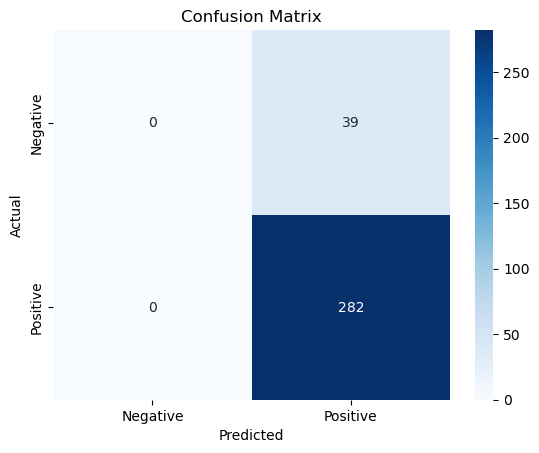

In [21]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 8. Visualize Results

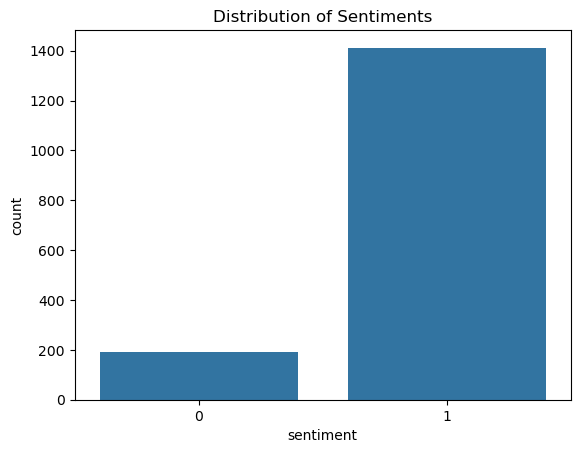

Top Positive Words: ['flu', 'bud', 'ok', 'think', 'see', 'system', 'got', 'measles', 'sure', 'fuck']
Top Negative Words: ['tell', 'thats', 'faith', 'stupid', 'animals', 'talk', 'sht', 'excellent', 'convince', 'doctors']


In [24]:
# Visualize the distribution of sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

# Get feature importance (words with highest coefficients)
feature_names = tfidf.get_feature_names_out()
coefs = model.coef_[0]
top_positive_words = [feature_names[i] for i in coefs.argsort()[-10:][::-1]]
top_negative_words = [feature_names[i] for i in coefs.argsort()[:10]]

print("Top Positive Words:", top_positive_words)
print("Top Negative Words:", top_negative_words)